In [1]:
### imports

# external modules
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../utils/'))
# add the paths to import local modules



# local modules
import get_oms_data
# importlib.reload(get_oms_data)  # not needed unless making live changes to the modules
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

import json_utils as jsonu
import plot_utils as pu

import mplhep as hep
# import matplotlib as matplot
# plt.style.use(hep.style.cms)
hep.style.use("CMS")

import OMS_RR_utils
importlib.reload(OMS_RR_utils)
import OMS_RR_utils as omsu

import json


In [2]:
Df_dict={"runs": pd.read_csv("2018AEra_runs.csv"),
        "lumisections": pd.read_csv("Runs_315190-316766_LS.csv")}


Df_dict["golden_UL_2017"] = json.load(open("Custom Json/golden_UL_2017.json"))

Df_dict["golden_UL_2018"] = json.load(open("Custom Json/golden_UL_2018.json"))

Df_dict["Zerobias"] = pd.read_csv("Zerobias_rates_2018A.csv")

In [3]:
Df_dict.keys()

dict_keys(['runs', 'lumisections', 'golden_UL_2017', 'golden_UL_2018', 'Zerobias'])

In [4]:
Df_dict["golden_UL_2018"]["315705"]

[[1, 700]]

In [5]:
refrun = 315713

In [6]:
Df_dict['golden_UL_2017'].keys()

dict_keys(['297050', '297056', '297057', '297099', '297100', '297101', '297113', '297114', '297175', '297176', '297177', '297178', '297179', '297215', '297218', '297219', '297224', '297225', '297227', '297292', '297293', '297296', '297308', '297359', '297411', '297424', '297425', '297426', '297429', '297430', '297431', '297432', '297433', '297434', '297435', '297467', '297468', '297469', '297483', '297484', '297485', '297486', '297487', '297488', '297503', '297504', '297505', '297557', '297558', '297562', '297563', '297598', '297599', '297603', '297604', '297605', '297606', '297620', '297656', '297665', '297666', '297670', '297674', '297675', '297722', '297723', '298996', '298997', '299000', '299042', '299061', '299062', '299064', '299065', '299067', '299096', '299149', '299178', '299180', '299184', '299185', '299327', '299329', '299368', '299369', '299370', '299380', '299381', '299394', '299395', '299396', '299420', '299443', '299450', '299477', '299478', '299479', '299480', '299481',

In [7]:
if str(refrun) in  Df_dict["golden_UL_2018"]:
    print(refrun)

315713


In [32]:
Df_dict["runs"]

,components,l1_hlt_mode_stripped,l1_key,duration,l1_triggers_counter,hlt_physics_throughput,init_lumi,last_update,recorded_lumi,delivered_lumi,...,hlt_physics_size,fill_type_runtime,hlt_key,last_lumisection_number,l1_rate,l1_menu,run_number,stable_beam,hlt_physics_counter,Fill location
0,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v66,l1_trg_collisions2018/v9,2733,139241030.0,1.124304,0.363444,2018-04-26T08:25:04Z,7.581242,7.945422,...,3013.917,PROTONS,/cdaq/physics/firstCollisions18/v1.9/HLT/V2,115.0,51943.050,L1Menu_Collisions2018_0_0_1,315190,True,3739568.0,(1/1)
1,"['CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'DQM', 'D...",cosmics2018/v103,l1_trg_cosmics2018/v62,650,521847.0,0.007351,0.000000,2018-04-26T08:41:18Z,0.000000,0.000000,...,4.627,COSMICS,/cdaq/cosmic/commissioning2018/CRAFT/v1.2/HLT/V2,27.0,829.159,L1Menu_Collisions2018_0_0_1,315193,False,79719.0,(1/42)
2,"['CTPPS', 'DAQ', 'DCS', 'DQM', 'DT', 'ECAL', '...",cosmics2018/v103,l1_trg_cosmics2018/v62,3502,2679933.0,0.003966,0.000000,2018-04-26T09:42:13Z,0.000000,0.000000,...,13.774,COSMICS,/cdaq/cosmic/commissioning2018/CRAFT/v1.2/HLT/V2,149.0,771.606,L1Menu_Collisions2018_0_0_1,315194,False,194572.0,(2/42)
3,"['CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'DQM', 'D...",cosmics2018/v104,l1_trg_cosmics2018/v62,191,108364.0,0.000281,0.000000,2018-04-26T10:00:55Z,0.000000,0.000000,...,0.046,COSMICS,/cdaq/cosmic/commissioning2018/CRAFT/v1.2/HLT/V2,7.0,664.118,L1Menu_Collisions2018_0_0_1,315201,False,1538.0,(3/42)
4,"['CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'DQM', 'D...",collisions2018/v67,l1_trg_collisions2018/v9,171,87166.0,0.000031,0.000000,2018-04-26T10:05:56Z,0.000000,0.000000,...,0.004,PROTONS,/cdaq/physics/firstCollisions18/v1.9/HLT/V2,6.0,623.238,L1Menu_Collisions2018_0_0_1,315205,False,15.0,(4/42)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",circulating2018/v53,l1_trg_circulating2018/v30,3345,4185365.0,0.010030,0.000000,2018-05-28T03:54:43Z,0.000000,0.000000,...,33.199,PROTONS,/cdaq/special/Circulating2018/v1.0.4/HLT/V1,142.0,1264.454,L1Menu_Collisions2018_v1_0_0,316991,False,448437.0,(1/4)
807,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v129,l1_trg_collisions2018/v24,5939,291834078.0,0.951853,1.734761,2018-05-28T05:59:26Z,72.380359,80.968703,...,5613.588,PROTONS,/cdaq/physics/Run2018/2e34/v2.1.5/HLT/V2,254.0,49485.000,L1Menu_Collisions2018_v1_0_0,316993,True,6148938.0,(2/4)
808,"['CSC', 'CTPPS_TOT', 'DAQ', 'DCS', 'DQM', 'DT'...",collisions2018/v129,l1_trg_collisions2018/v24,357,17125469.0,1.025416,1.507453,2018-05-28T06:07:16Z,4.541492,6.574086,...,334.640,PROTONS,/cdaq/physics/Run2018/2e34/v2.1.5/HLT/V2,14.0,52477.440,L1Menu_Collisions2018_v1_0_0,316994,True,375301.0,(3/4)
809,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v129,l1_trg_collisions2018/v24,14896,936541983.0,0.785291,1.486996,2018-05-28T10:20:57Z,179.231961,184.713406,...,11678.885,PROTONS,/cdaq/physics/Run2018/2e34/v2.1.5/HLT/V2,638.0,62974.516,L1Menu_Collisions2018_v1_0_0,316995,True,14644165.0,(4/4)


In [61]:
importlib.reload(OMS_RR_utils)
import OMS_RR_utils as omsu

In [62]:
pd.options.mode.chained_assignment = None  # default='warn'

target=316201

RankDF=omsu.ref_rank(Df_dict,
         target,
         Trim=True) \
[['run_number',"Run_Rank",
  'run_number_delta',"run_number_delta %",
  'pileup_delta',"pileup_delta %","ave_pileup",
  "number_of_lumisections_delta","num_lumi_delta %","last_lumisection_number"
  ,"inst_lumi_delta","inst_lumi_delta %","ave_inst_lumi",
  'Fill location',"fill_number","l1_hlt_mode"]] \
.set_index('run_number') \
.sort_values(by=["Run_Rank"], key=lambda x: x.abs(),ascending=True)
#,"inst_lumi_delta %",'pileup_delta %','run_number_delta'
RankDF #.loc[[316187,315713,315705]]

Trimming dataframes

Target run : 316201
Fill location : (5/6)
Fill number : 6675.0
average pileup : 26.85062001015781
last lumi : 498.0
avg inst lumi : 0.9598289318145956
L1 HLT mode : collisions2018


,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
run_number,,,,,,,,,,,,,,,
315703,0.862474,14,-0.157495,9.111186,33.932871,35.961806,47.0,9.437751,545.0,0.277168,28.876813,1.236997,(8/10),6640.0,collisions2018
315690,0.894851,13,-0.161606,-4.702935,-17.515183,22.147685,168.0,33.734940,666.0,-0.242212,-25.234958,0.717617,(14/14),6639.0,collisions2018
315489,0.931375,8,-0.225173,2.177710,8.110463,29.028330,211.0,42.369478,709.0,-0.332653,-34.657577,0.627175,(3/4),6628.0,collisions2018
315705,0.953424,15,-0.156862,-4.652014,-17.325535,22.198606,212.0,42.570281,710.0,-0.196252,-20.446553,0.763577,(10/10),6640.0,collisions2018
315645,0.954193,10,-0.175838,11.781376,43.877483,38.631996,96.0,19.277108,594.0,0.213703,22.264743,1.173532,(18/21),6638.0,collisions2018
316059,1.051940,22,-0.044908,9.308924,34.669306,36.159544,69.0,13.855422,567.0,0.332766,34.669306,1.292595,(10/13),6662.0,collisions2018
315270,1.208494,0,-0.294433,11.997120,44.680980,38.847740,157.0,31.526104,655.0,-0.428490,-44.642315,0.531339,(8/9),6616.0,collisions2018
315366,1.231173,5,-0.264073,5.257864,19.581908,32.108484,277.0,55.622490,775.0,-0.411891,-42.912923,0.547938,(8/8),6621.0,collisions2018
315361,1.253381,4,-0.265654,23.006899,85.684795,49.857519,121.0,24.297189,619.0,-0.108999,-11.356138,0.850829,(4/8),6621.0,collisions2018


In [63]:
RankDF.shape

(28, 15)

In [64]:
RankDF.sort_index()

,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
run_number,,,,,,,,,,,,,,,
315270,1.208494,0,-0.294433,11.997120,44.680980,38.847740,157.0,31.526104,655.0,-0.428490,-44.642315,0.531339,(8/9),6616.0,collisions2018
315322,2.699519,1,-0.277988,14.516819,54.065118,41.367439,866.0,173.895582,1364.0,-0.393445,-40.991182,0.566384,(15/15),6617.0,collisions2018
315339,1.356449,2,-0.272611,16.978619,63.233619,43.829239,164.0,32.931727,662.0,-0.359739,-37.479534,0.600090,(7/7),6618.0,collisions2018
315357,1.620062,3,-0.266919,18.734378,69.772607,45.584998,350.0,70.281124,848.0,-0.181911,-18.952440,0.777918,(4/4),6620.0,collisions2018
315361,1.253381,4,-0.265654,23.006899,85.684795,49.857519,121.0,24.297189,619.0,-0.108999,-11.356138,0.850829,(4/8),6621.0,collisions2018
315366,1.231173,5,-0.264073,5.257864,19.581908,32.108484,277.0,55.622490,775.0,-0.411891,-42.912923,0.547938,(8/8),6621.0,collisions2018
315420,3.296015,6,-0.246995,9.519879,35.454968,36.370499,1259.0,252.811245,1757.0,-0.339158,-35.335301,0.620670,(2/2),6624.0,collisions2018
315488,1.941770,7,-0.225489,16.373502,60.979979,43.224122,615.0,123.493976,1113.0,-0.025944,-2.703017,0.933885,(2/4),6628.0,collisions2018
315489,0.931375,8,-0.225173,2.177710,8.110463,29.028330,211.0,42.369478,709.0,-0.332653,-34.657577,0.627175,(3/4),6628.0,collisions2018


In [54]:
RankDF.loc[[316187,315713,315705]].sort_values("Run_Rank",key=lambda x: x.abs(),ascending=True)

,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
run_number,,,,,,,,,,,,,,,
315705,0.739721,15,-0.156862,-4.652014,-17.325535,22.198606,212.0,42.570281,710.0,-0.196252,-20.446553,0.763577,(10/10),6640.0,collisions2018
315713,1.718722,16,-0.154332,13.170078,49.049438,40.020698,634.0,127.309237,1132.0,0.416784,43.422719,1.376613,(7/7),6641.0,collisions2018
316187,1.926428,26,-0.004428,1.173742,4.371376,28.024362,1579.0,317.068273,2077.0,0.041958,4.371389,1.001787,(5/5),6674.0,collisions2018


Run number delta %
Inst lumi delta %
pu delta %


In [56]:
index=RankDF.index
index

Int64Index([316187, 316060, 316114, 315646, 315512, 315705, 315790, 315690,
            315489, 315703, 315840, 316059, 315689, 315645, 315973, 316153,
            315366, 315721, 315488, 315420, 315713, 315800, 316199, 315357,
            315270, 315322, 315361, 315339],
           dtype='int64', name='run_number')

In [57]:
idx=RankDF.index.sort_values()[::2]
idx2=np.arange(min(index)+1,max(index),2)
idx3=[i for i in idx2 if i in RankDF.index]

In [71]:
idx3

[315339,
 315357,
 315361,
 315489,
 315645,
 315689,
 315703,
 315705,
 315713,
 315721,
 315973,
 316059,
 316153,
 316187]

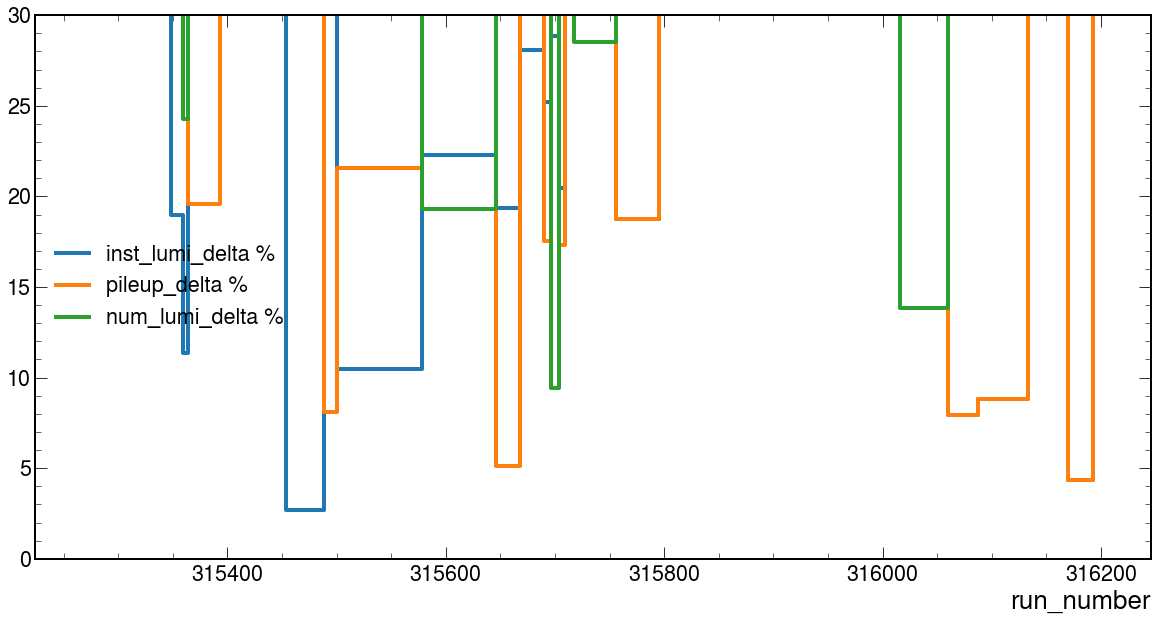

In [30]:
RankDF.sort_index()[["inst_lumi_delta %","pileup_delta %",'num_lumi_delta %']].abs().plot(
#                             ["number_of_lumisections_delta","run_number_delta"],
            figsize=(20,10),kind="line",drawstyle="steps-mid",lw=4)
plt.ylim(0,30)
# plt.xlim(4843,9934)
plt.show()

# RankDF.sort_index()[["inst_lumi_delta %","pileup_delta %"]].abs().plot(
#                             #"number_of_lumisections_delta","run_number_delta"],
#             figsize=(20,10),kind="line",drawstyle="steps-mid")
# plt.xticks(ticks=index,labels=index)
# plt.xlim(index[2]-5,index[2]+20)

# plt.show()


In [11]:
x = RankDF.index[[0,1,2,3,4,14,32]]

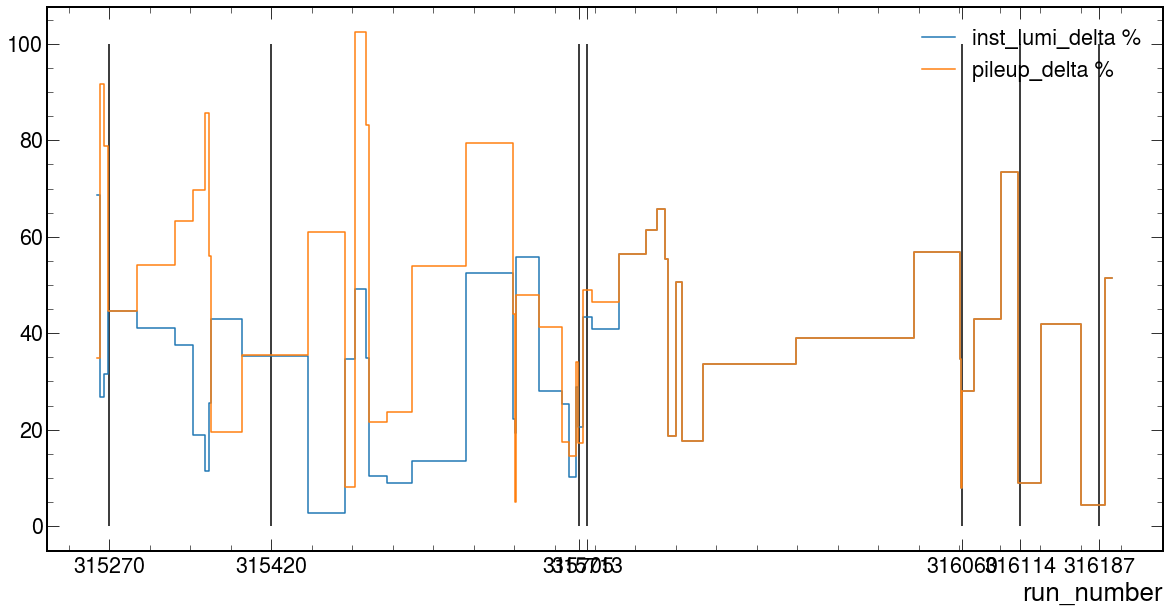

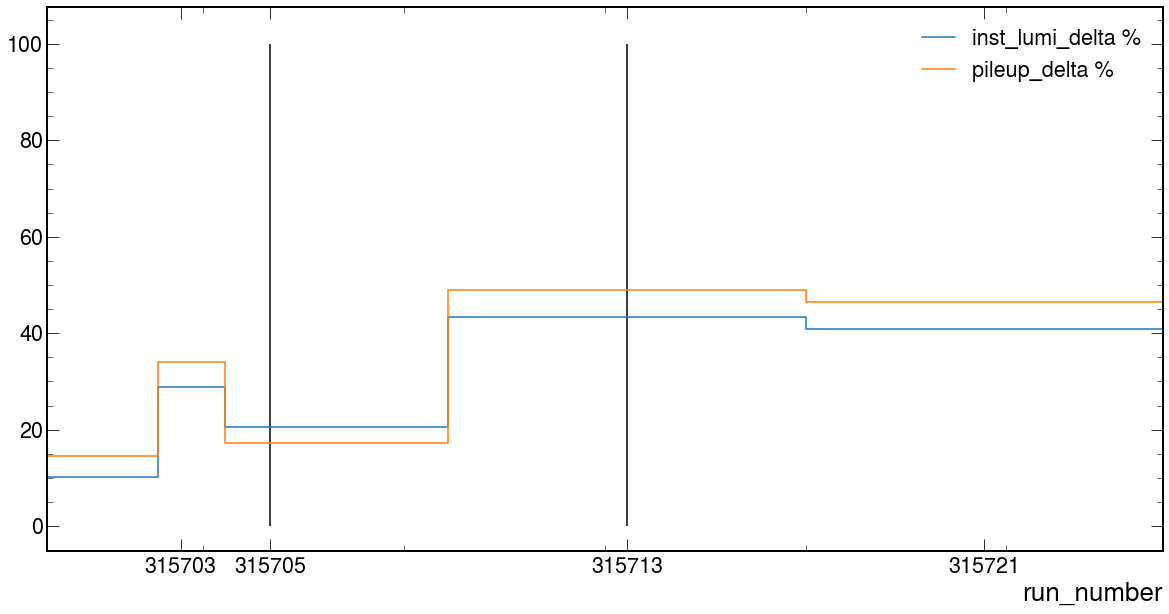

In [17]:
RankDF.sort_index()[["inst_lumi_delta %","pileup_delta %"]].abs().plot(
                            #"number_of_lumisections_delta","run_number_delta"],
            figsize=(20,10),kind="line",drawstyle="steps-mid")
plt.vlines(x,ymin=0,ymax=100,colors="k")
plt.xticks(ticks=x)
plt.show()

RankDF.sort_index()[["inst_lumi_delta %","pileup_delta %"]].abs().plot(
                            #"number_of_lumisections_delta","run_number_delta"],
            figsize=(20,10),kind="line",drawstyle="steps-mid")
plt.xticks(ticks=idx3,labels=idx3)
plt.xlim(index[2]-5,index[2]+20)
plt.vlines(x,ymin=0,ymax=100,colors="k")

plt.show()


In [8]:
ZB= Df_dict["Zerobias"]

In [31]:
ZB_missing=omsu.missing_runs(Df_dict["runs"],Df_dict["Zerobias"],fromlumi=False)

ZB_missing

[316558]

In [32]:
ZB_skim = Df_dict["Zerobias"].set_index("run_number").drop(ZB_missing).reset_index()

ZB_skim

,run_number,start_time,last_lumisection_number,rate,last_lumisection_in_run,first_lumisection_number,dataset_name,cms_active,events
0,315190,2018-04-26T06:32:38Z,10,108.320705,115.0,10,ZeroBias,True,2525
1,315190,2018-04-26T06:33:02Z,11,102.958294,115.0,11,ZeroBias,True,2400
2,315190,2018-04-26T06:33:25Z,12,102.700898,115.0,12,ZeroBias,True,2394
3,315190,2018-04-26T06:33:48Z,13,101.413919,115.0,13,ZeroBias,True,2364
4,315190,2018-04-26T06:34:12Z,14,105.231956,115.0,14,ZeroBias,True,2453
...,...,...,...,...,...,...,...,...,...
93130,316995,2018-05-28T09:12:24Z,634,10.681923,638.0,634,ZeroBias,True,249
93131,316995,2018-05-28T09:12:47Z,635,10.424527,638.0,635,ZeroBias,True,243
93132,316995,2018-05-28T09:13:10Z,636,9.909736,638.0,636,ZeroBias,True,231
93133,316995,2018-05-28T09:13:33Z,637,8.837254,638.0,637,ZeroBias,True,206


In [12]:
ZB.columns

Index(['start_time', 'last_lumisection_number', 'rate', 'run_number',
       'last_lumisection_in_run', 'first_lumisection_number', 'dataset_name',
       'cms_active', 'events'],
      dtype='object')

In [32]:
ZB.groupby("run_number").mean().rate.loc[[316187,315713,315705,target]]

run_number
316187    80.348359
315713    61.514139
315705    62.505000
316201    80.814695
Name: rate, dtype: float64

In [174]:
ZB.groupby("run_number").mean().loc[[316187,315713,315705,target]]

,last_lumisection_number,rate,last_lumisection_in_run,first_lumisection_number,cms_active,events
run_number,,,,,,
316187,1042.0,80.348359,2077.0,1042.0,1.0,1872.953163
315713,571.5,61.514139,1132.0,571.5,1.0,1433.919786
315705,360.5,62.505000,710.0,360.5,1.0,1457.017143
316201,250.5,80.814695,498.0,250.5,1.0,1883.823651


array([[<AxesSubplot:title={'center':'rate'}>]], dtype=object)

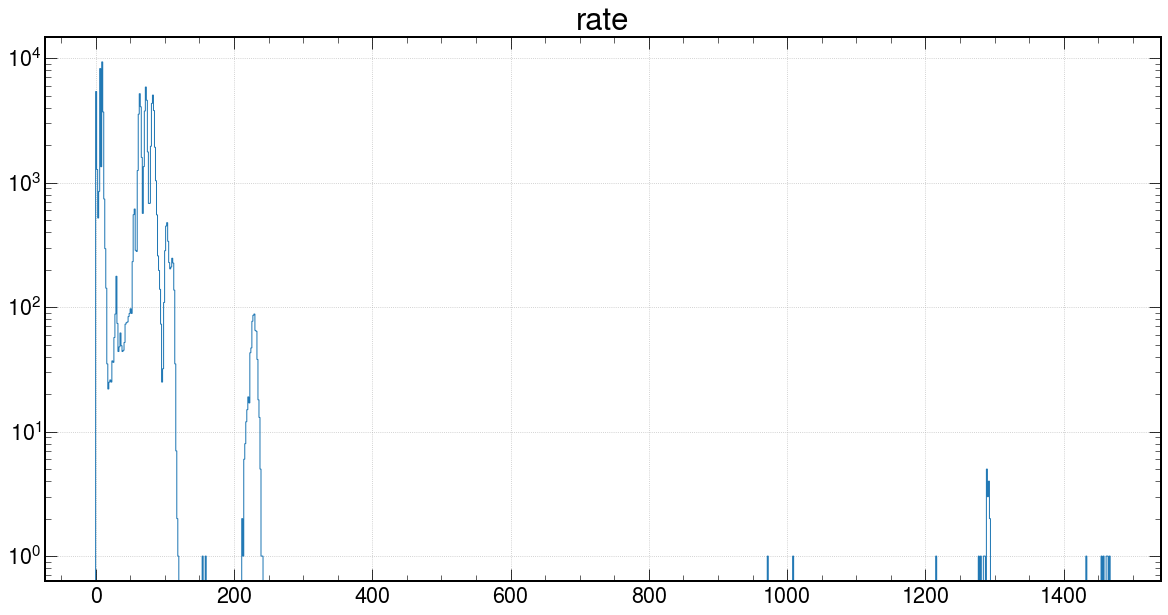

In [57]:
ZB.hist(column='rate',
       figsize=(20,10),bins=1000,
#         kind="hist",
#         drawstyle="steps-mid",
        histtype='step',
        log=True
       )

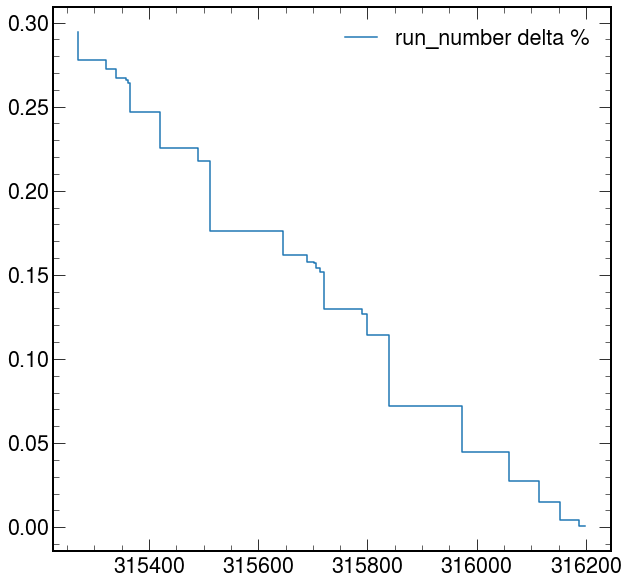

In [128]:
x = RankDF.reset_index().sort_values("run_number")["run_number"]
# plt.step(x,RankDF["pileup_delta %"],label="pileup delta %")
# plt.step(x,RankDF["inst_lumi_delta %"],label="instLumi delta %")
plt.step(x,RankDF["run_number_delta %"].abs().sort_index(),label="run_number delta %")
plt.legend()
plt.show()